***

## Upper Confidence Bound

***

### Data Preprocessing

#### Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("C:/Users/HP Elitebook/OneDrive/Bureau/HOMEWORKS/PYTHON/ML_BOOTCAMP/Machine Learning A-Z (Codes and Datasets)/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Python/Ads_CTR_Optimisation.csv")
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing UCB

In [3]:
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards =  [0]*d
total_rewards = 0
for n in range(0, N):
    ad = 0                                 # We must select an ad at the beginning of the iteration prior to the UCB steps
    max_upper_bound = 0                    # that's why we setted that ad and max upper bound to 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            upper_bound = average_reward + math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
        else:
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    sums_of_rewards[ad] = sums_of_rewards[ad] + df.values[n, ad] 
    total_rewards = total_rewards + df.values[n, ad]       


### Visualization

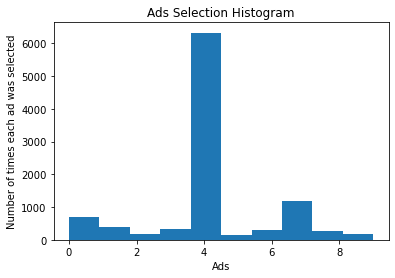

In [4]:
plt.hist(ads_selected)
plt.title('Ads Selection Histogram')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()